In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [3]:
cd=pd.read_csv("crime_data.csv")

In [4]:
cd.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
cd.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [6]:
cd.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
cd.shape

(50, 5)

In [10]:
cd.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [11]:
cd.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [14]:
cd1=cd.drop("Unnamed: 0",axis=1)
cd1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [16]:
std_scaler = StandardScaler()
cd_scaler=std_scaler.fit_transform(cd1)
cd_scaler=pd.DataFrame(cd1)
cd_scaler.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

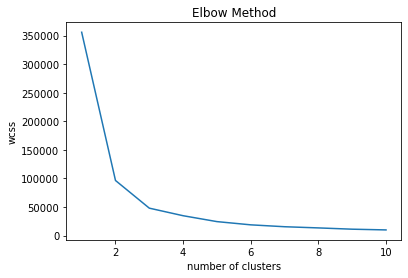

In [19]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(cd_scaler)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show

In [21]:
km=KMeans(3,random_state=42)
km.fit(cd1)

KMeans(n_clusters=3, random_state=42)

In [23]:
y_km=km.fit_predict(cd_scaler)
y_km

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0])

In [29]:
cc=pd.DataFrame(y_km,columns=['clusters'])
cc.head()

,clusters
0,2
1,2
2,2
3,0
4,2


In [30]:
cc.value_counts()

clusters
1           20
2           16
0           14
dtype: int64

In [38]:
cd['clusters']=cc
cd['clusters'].head()

0    2
1    2
2    2
3    0
4    2
Name: clusters, dtype: int32

In [39]:
cd[cd['clusters']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
3,Arkansas,8.8,190,50,19.5,0
5,Colorado,7.9,204,78,38.7,0
9,Georgia,17.4,211,60,25.8,0
20,Massachusetts,4.4,149,85,16.3,0
24,Missouri,9.0,178,70,28.2,0
29,New Jersey,7.4,159,89,18.8,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0
38,Rhode Island,3.4,174,87,8.3,0
41,Tennessee,13.2,188,59,26.9,0


In [40]:
cd[cd['clusters']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
6,Connecticut,3.3,110,77,11.1,1
10,Hawaii,5.3,46,83,20.2,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1


In [41]:
cd[cd['clusters']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
17,Louisiana,15.4,249,66,22.2,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2


In [43]:
cd[cd['clusters']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters


In [44]:
cd.groupby(by='clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,8.214286,173.285714,70.642857,22.842857
1,1,4.270000,87.550000,59.750000,14.390000
2,2,11.812500,272.562500,68.312500,28.375000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

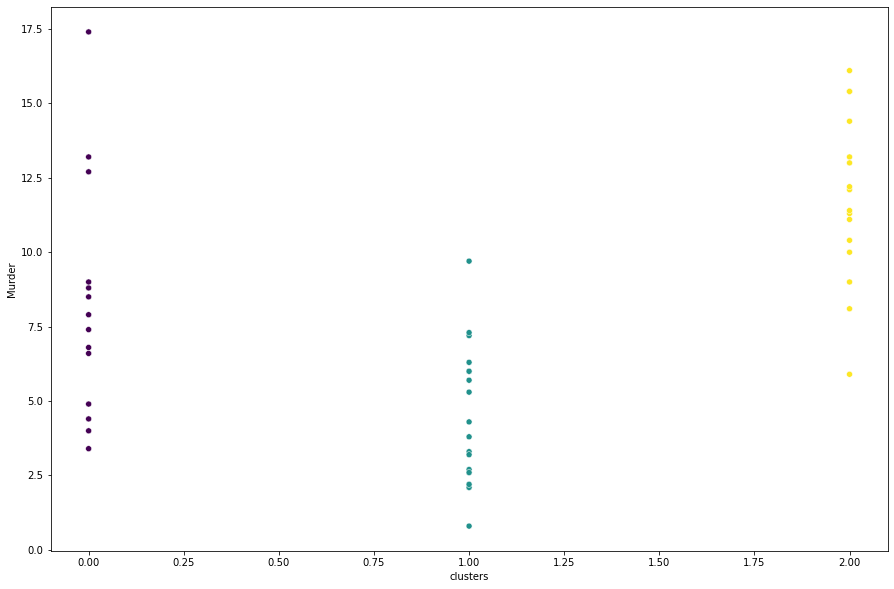

In [46]:
plt.figure(figsize=(15,10))
sn.scatterplot(cd['clusters'],cd['Murder'],c=km.labels_)
plt.show